In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
def showImg(img, colored=False):
  plt.figure(figsize=(20,20))
  plt.axis("off")
  if (len(img.shape) == 3):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  elif(colored):
    plt.imshow(img)
  else:
    plt.imshow(img, 'gray')

In [13]:
def hw1(img_final):
  img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, mask = cv2.threshold(img2gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
  ret, new_img = cv2.threshold(image_final, 127, 255, cv2.THRESH_BINARY_INV)

  kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                       3))
  dilated = cv2.dilate(new_img, kernel, iterations=1)

  contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

  result_img = np.zeros(img2gray.shape)

  for contour in contours:
      # get rectangle bounding contour
      [x, y, w, h] = cv2.boundingRect(contour)

      # Don't plot small false positives that aren't text
      if w < 35 and h < 35:
          continue

      # draw rectangle around contour on original image
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

      cropped = img2gray[y :y +  h , x : x + w]
      
      _, threshed = cv2.threshold(cropped, 127, 255, cv2.THRESH_BINARY)
      
      colors, counts = np.unique(threshed, return_counts=True)
      black_index = np.where(colors == 0)[0]
      white_index = np.where(colors == 255)[0]
      if (counts[black_index]/counts[white_index] > 1):
        _, result = cv2.threshold(cropped, 127, 255, cv2.THRESH_BINARY)
      else:
        _, result = cv2.threshold(cropped, 127, 255, cv2.THRESH_BINARY_INV)

      result_img[y :y +  h , x : x + w] = result
  return result_img

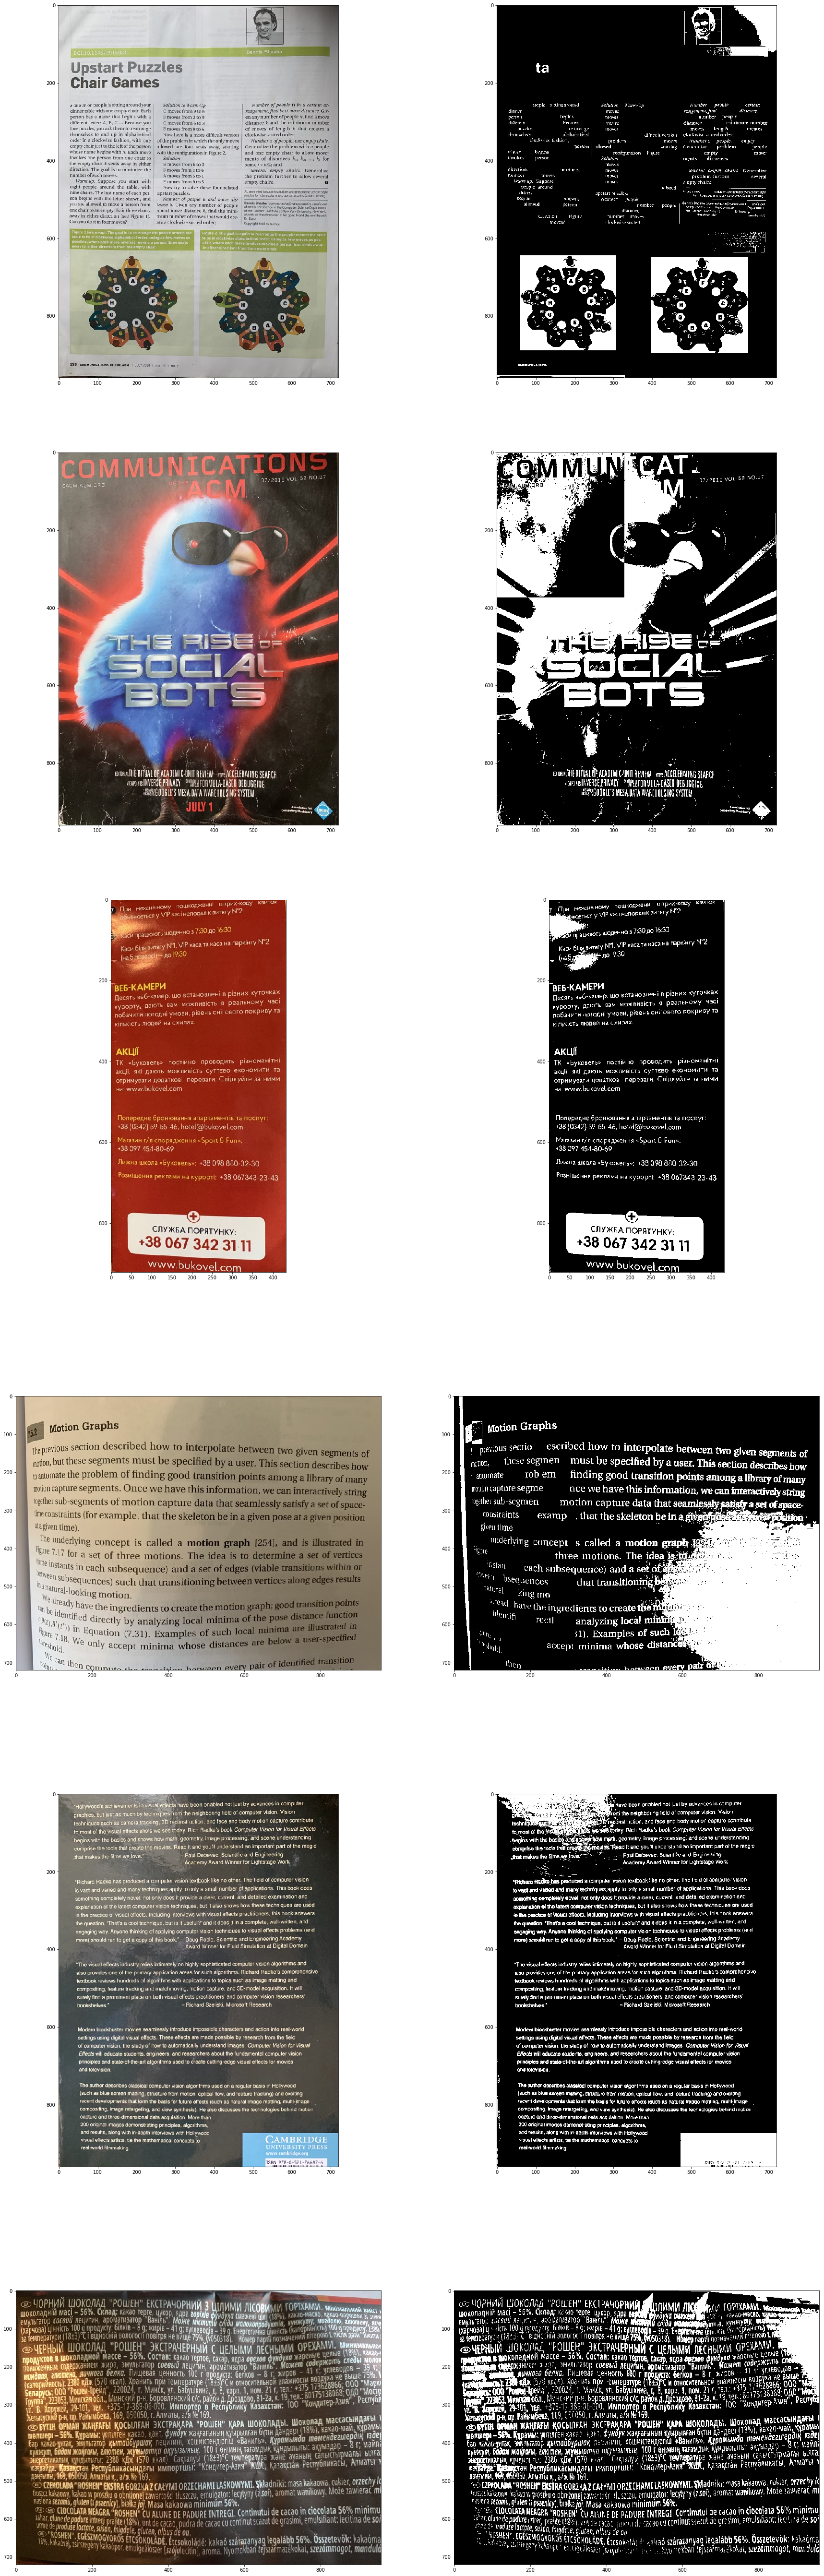

In [19]:
fig, axes = plt.subplots(6,2)
fig.set_size_inches((30,100))

for i in range(6):
  img = cv2.imread(f"images/text/text{i+1}.jpg")
  axes[i,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  res = hw1(img)
  axes[i,1].imshow(res, 'gray')
#   plt.savefig(f"res{i}.png")
  cv2.imwrite(f"./results/text/res{i}.png",res)
  
plt.show()

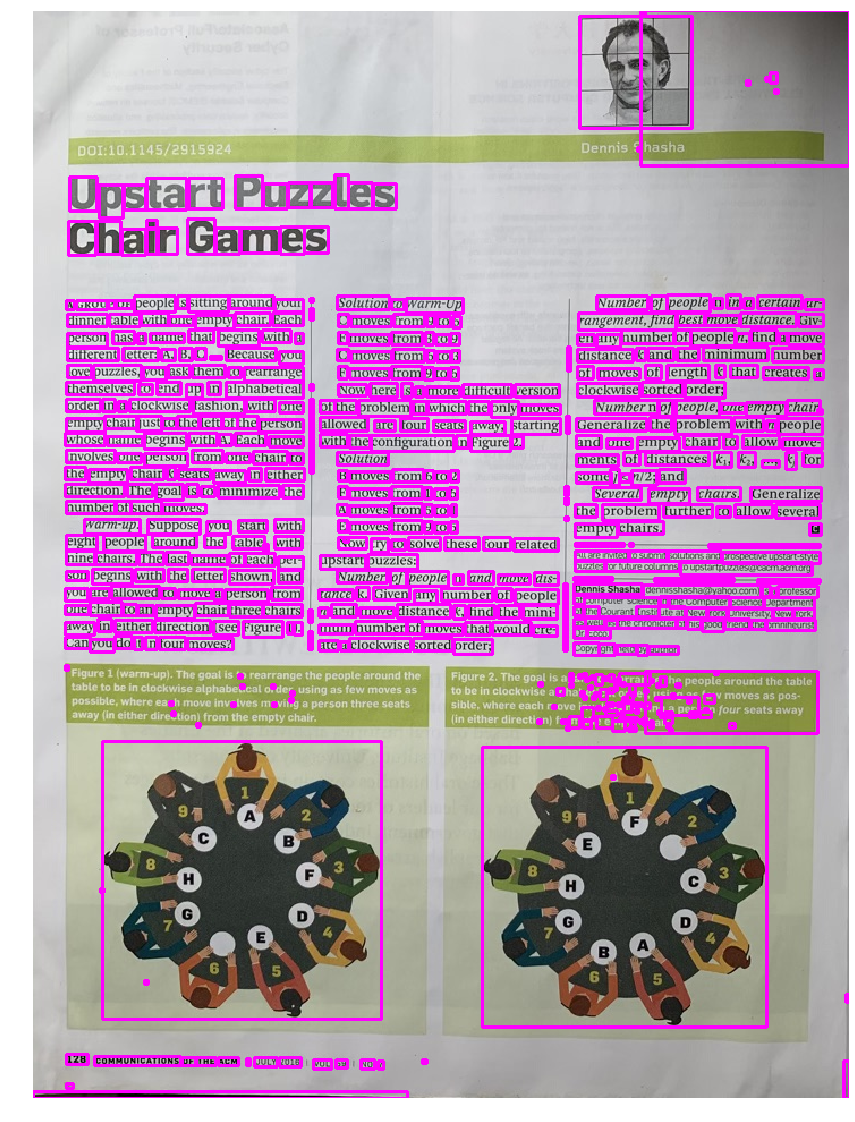

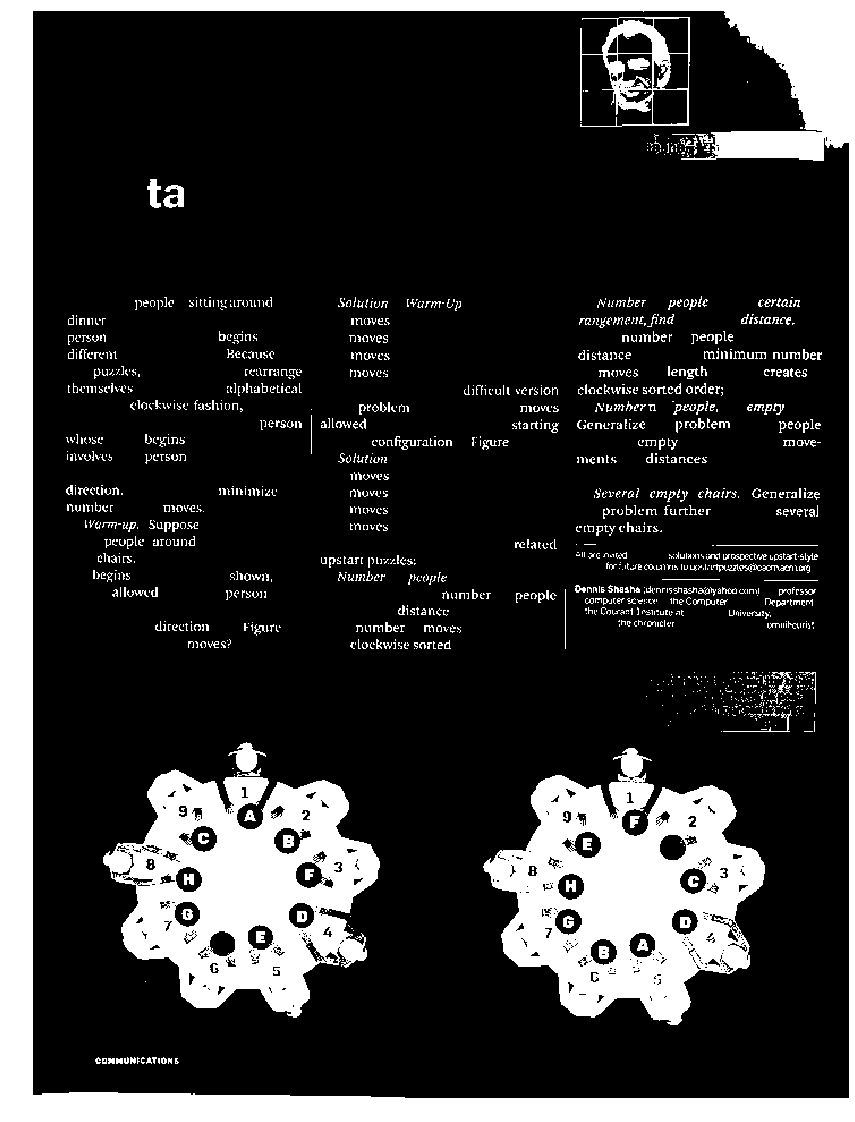

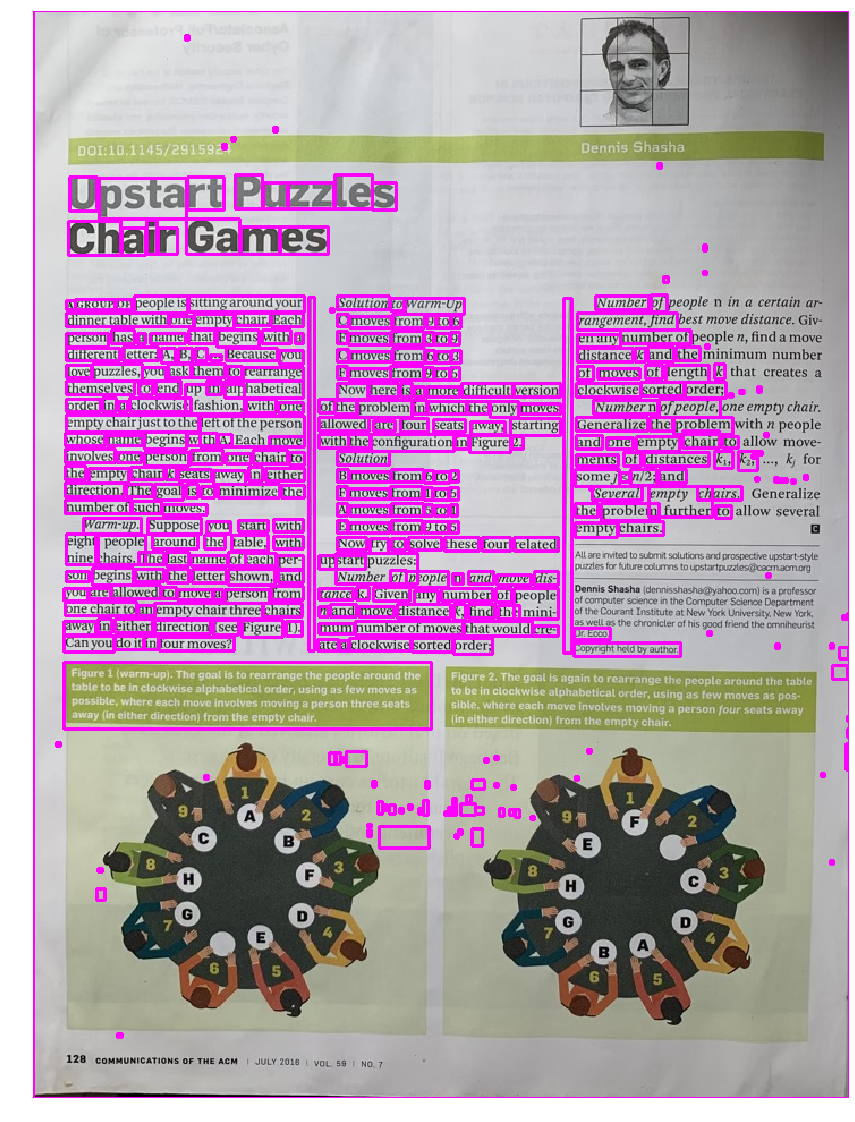

In [ ]:
captch_ex("text1.jpg")

In [ ]:
cv2.__version__

'3.4.3'